### Question: When during the day is most dangerous?

Let's see how accidents are splitted based on the place of the event and see where we can feel to be the safest.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv('data/caracteristics.csv', encoding='latin1')
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


Let's check the 'lum' column and change the values there.
* 1 - Full day
* 2 - Twilight or dawn
* 3 - Night without public lighting
* 4 - Night with public lighting not lit
* 5 - Night with public lighting on

But first check if there are a missing values in column that we want to work on.

In [14]:
dataset.columns[dataset.isna().sum() != 0]

Index(['atm', 'col', 'com', 'adr', 'gps', 'lat', 'long'], dtype='object')

Now, let's change the 'lum' column to be more understandable by humans.

In [15]:
dataset['lum'] = dataset['lum'].astype(str) 
dataset['lum'] = dataset['lum'].replace({'2': 'Twilight or dawn', '1': 'Full day', '3': 'Night no public lighting', '4': 'Night lighting not lit', '5': 'Night with public lighting on'})

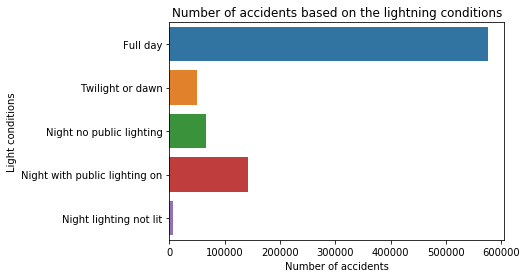

In [16]:
plt.clf()
ax = sns.countplot(y = 'lum', data=dataset)
ax.set_title('Number of accidents based on the lightning conditions')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Light conditions')
plt.show()